# Signaltransformation


In [3]:
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.signal as sg

#### Signal mit normalverteiltem (weißen) Rauschen

Wir laden hier eine verrauschte Version des Ihnen bereits bekannten EKG-Signals. Der Übersichtlichkeit wegen schauen wir uns nur die ersten 500 Samples des Signals an.

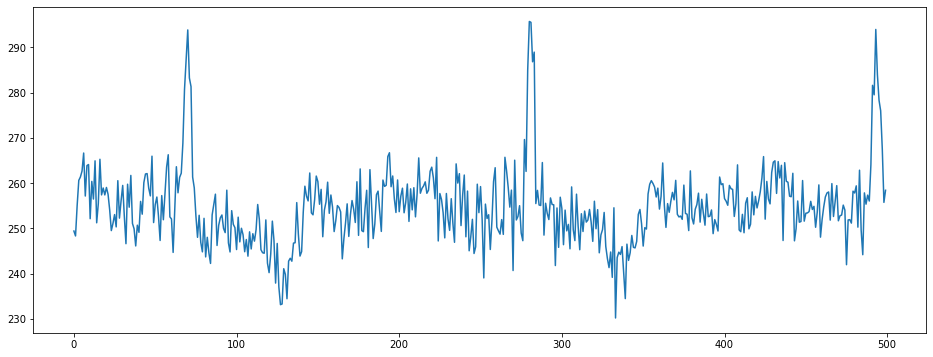

In [11]:
plt.rcParams["figure.figsize"] = (16,6)
data_dir = "../../data"

f = open(os.path.join(data_dir,'ecg_from_smallSampleFile.txt'), "r")
# Einlesen der Daten mit numpy
ecg = np.loadtxt(f)
f.close()
ecg_noisy = ecg + np.random.normal(np.mean(ecg), 5, len(ecg))
plt.plot(ecg_noisy[0:500])

### Einfache Filter

Um normalverteiltes ("weißes") Rauschen zu entfernen, ist ein Moving Average Filter gut brauchbar. Anstatt die Filterung selbst (durch eine Schleife und Mittelwerte) zu implementieren, werden wir eine Faltung (Convolution) berechen. Als erstes erstellen wir uns einen Moving-Average Kernel; dazu erzeugen wir einfach ein Array aus Einsen, das wir durch die Anzahl seiner Elemente teilen, was später effektiv die lokalen Mittelwerte unseres verrauschten Signals berechnen wird.

In [12]:
window_size = 10 # Die Breite unseres Filters
filt_ma = np.ones((window_size,))/window_size
print("filt_ma = " + str(filt_ma))

imp = np.zeros(100)
imp[0] = 1
print("imp = " + str(imp))

filt_ma = [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
imp = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


**Q4.1** 
Die Numpy-Bibliothek enthält eine Faltungsfunktion, die Sie verwenden können: 
https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html
* Berechnen Sie damit die sog. "Impulsantwort", indem Sie das Impulssignal _imp_ mit dem Array der Filterkoeffizienten falten und plotten Sie diese. Die Impulsantwort ist die Wirkung, die ein Filter (bestehend aus Filterkoeffizienten) auf ein Impulssignal - also einen einzelnen Funktionswert != 0 - hat. Dies ist eine übliche Darstellung eines Filters. 

In [ ]:
# imp_resp = ...
pass

**Q4.2:** Als nächstes falten Sie die Impulsantwort mit unserem verrauschten EKG. Stellen Sie Ausgangssignal und das gefilterte Ergebnis in einem Plot dar. (Sie können den Bildauschnitt beim Plotten verringern - bei mehr als 500 Samples ist der Plot wenig lesbar.)

In [ ]:
# ecg_filt = ...
pass

# plot(x[0:?], y[0:?])
pass

**Q4.3:** Experimentieren Sie mit verschiedenen Filtergrößen (window_size).
Was fällt Ihnen auf? Passen Sie wieder den dargestellten Ausschnitt entsprechend an.

In [ ]:
# window_size = ...

# Filterung
pass

# Plot
pass

Bestimmt ist Ihnen aufgefallen, dass sich abhängig von der Größe ihres Filters das gefilterte Signal relativ zum Ausgangssignal verschiebt. (Falls nicht, oder falls Sie diesen Text vor Bearbeitung der vorigen Aufgabe gelesen haben, bearbeiten Sie die Aufgabe und probieren Sie es aus.) Diesen _"Delay"_ kann man mit folgender Formel beschreiben.

\[
delay = 0.5*(len(filt_ma) - 1)/fs
\]

Sofern wir wie hier Samples betrachten anstatt von echten Zeiteinheiten, können wir die Samplingfrequenz _fs_ als 1 annehmen und somit ignorieren.

**Q4.4:** Verschieben Sie, falls noch nicht geschehen, die beiden Plots (gefiltert vs. ungefiltert) zueinander, indem Sie den Bildausschnitt des gefilterten Signals unter Verwendung des Delays anpassen.

In [ ]:
delay = math.ceil(0.5 * (len(filt_ma) -1)) # Aufrunden

# Zueinander verschobene Plots
pass

##### Gauss-Filter
Als nächstes wiederholen wir die Filterung mit einem anderen Filter. Anstatt konstanter Filterkoeffizienten verwenden wir eine Glockenkurve. Damit wollen wir die Werte des Ausgangssignals stärker erhalten; ein hoher Wert im Signal sollte also weniger stark durch unseren Filter gedämpft werden.

In [ ]:
x2 = np.arange(-5, 5, 0.5)
filt_gauss = 1 / np.sqrt(2 * np.pi) * np.exp(-x2 ** 2 / 2.)
filt_gauss = filt_gauss / sum(filt_gauss)
print(filt_gauss)
imp_resp_gauss = np.convolve(filt_gauss, imp)
plt.plot(imp_resp_gauss)

In [ ]:
ecg_filt_gauss = np.convolve(imp_resp_gauss, ecg_noisy)
plt.plot(ecg_noisy[0:500])
delay_gauss = math.ceil(0.5 * (len(filt_gauss) -1))
print("Delay(filt_gauss) = "+ str(delay_gauss))
plt.plot(ecg_filt_gauss[delay_gauss:500])

### Fourier-Transformation

Als nächstes betrachten wir das Herausfiltern bestimmter Frequenzbereiche und wiederholen geleichzeitig das Konzept der Fouriertransformation. Hierzu erzeugen wir uns wieder ein Signal, dessen Frequenzanteile wir kennen - somit können wir unsere Ergebnisse einfach überprüfen.

In [ ]:
# simulate signal
xmax = 4.001
x = np.arange(0.0, xmax, 1/2500)
y = np.cos(2*np.pi*4*x)+2*np.cos(2*np.pi*60*x)+6*np.sin(2*np.pi*7*x)
plt.plot(x,y)

In [ ]:
dft = np.fft.fft(y) # Berechnen der Diskreten Fourier-Transformation mit dem Fast-Fourier-Transform-Algorithmus
freq = np.fft.fftfreq(len(x))*2500
mask = np.where(freq > 0) # Wir betrachten nur die positiven Frequenzen
plt.plot(freq[mask], abs(dft.real[mask]))
plt.xlabel('Frequenz /Hz')
plt.ylabel('Abs[dft]')

##### Zoom:

In [ ]:
plt.plot(freq[0:250,], abs(dft.real[0:250,]))
plt.axvline(x=10, ymin=-100, ymax=5400, color='r')

**Q4.6:** Nehmen wir an, wir kennen unser Signal und wissen, dass wir bei z.B. 60 Hz Signalanteile in unserem Signal vorfinden, die wir mit Sicherheit als Rauschen identifizieren können. Entfernen Sie alle Frequenzanteile oberhalb von 10 Hz in der Fouriertransformation  _dft_ des Signals. (Sie können dafür z.B. _np.where_ verwenden.) Anschließend berechnen Sie die inverse Fouriertransformation (**ifft**).

In [ ]:
# filt_dft = ...
pass

# ifft (Frequenzbereich)
# y_filt = ...
pass

In [ ]:
plt.plot(x[0:5000], y[0:5000], label='Original signal')
plt.plot(x[0:5000], y_filt[0:5000], linewidth=3, label='Filtered signal')
plt.xlabel('Time/ s')
plt.ylabel('Amplitude')

**Q4.6:** Verändern Sie wieder die Parameter, wie z.B. die Cut-Off-Frequenz im Beispiel oben und plotten Sie Ausgangssignal und ihre Filterung gemeinsam. Bestimmen Sie die Frequenz des verbleibenden Signals aus dem Frequenz-Plot und manuell (durch Zählen der Perioden).

In [ ]:
# Frequenz-Plot:
pass

In [ ]:
# Plot von roh vs. gefiltert (Zeitbereich)

pass

plt.xlabel('Time/ s')
plt.ylabel('Amplitude')

Die hier verbleibende 4 Hz -Schwingung ist genau, was an Hand der Frequenzdarstellung zu erwarten war; die Ähnlichkeit zum Ausgangssignal ist entsprechend gering, da große Teile des Signals entfernt wurden.

Filter können sowohl im Zeit- als auch im Frequenzbereich angewandt werden.
Anstatt einfach Frequenzen auf 0 zu setzen, verwendet man in der Praxis natürlich Filter im Frequenzbereich. Das hat unter Anderem den Vorteil, dass man sanftere Übergänge erzielen und komplexere Filtereffekte erzielen kann. 